**Linking A Global Mental Health Crisis To GDP per Capita, Gender, and Culture**

Darren Chen chen.darr@northeastern.edu

Mark Tran tran.mar@northeastern.edu


DS 2001 - Spring 2023
Data Sources: 

---
Data.world - https://data.world/vizzup/mental-health-depression-disorder-data

Github - https://github.com/rustom/hofstedes-globe/blob/main/data-parsing/hofstede.csv

Databank.worldbank.org - https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#advancedDownloadOptions

**Abstract**

Our data science project aims to investigate potential links between global mental health crises and economic and cultural indicators, such as GDP per capita, gender, and culture. By analyzing the relationship between these indicators and depression and suicide rates, we aim to visually illustrate the relationships between selected variables using scatterplots and color-coding.

Our project consists of four scatterplots. Scatterplots 1 and 2 display the relationship between suicide rates and countries with high masculine vs. feminine scores, as well as the relationship between suicide rates and countries with low individuality scores. Scatterplots 3 and 4 display the relationship between GDP per capita and depression count, as well as the relationship between poverty headcount ratio and suicide rates. All our graphs have been color-coded to indicate which continent each country is located in.

After graphing all of our scatterplots, we found that there were no significant results. Countries with higher GDP per capita and lower poverty headcount ratio were predicited to have lower depression and suicide rates. However, this wasn't the case in any significant way, as there were many countries with low GPD per capita that had just as low if not lower depression and suicide rates. 
Furthermore, we predicted that countries with more masculine cultures and lower individuality scores tend to have higher suicide rates, but our findings showed that many countries with the opposite standings. 

**Background**

Mental health is a global public health issue, and understanding some of the factors that can contribute to the crisis is essential for addressing the problem effectively. Our proposed research project, "Linking A Global Mental Health Crisis To GDP per Capita, Gender, and Culture," aims to explore the potential links between economic and cultural indicators and depression and suicide rates. Our project's significance lies in its contribution to the existing literature on global mental health, particularly regarding the relationship between economic and cultural factors.

Past research has indicated that economic indicators, such as GDP per capita and poverty headcount ratio, are significant predictors of depression and suicide rates. For instance, a study by Mair and colleagues (2013) found that higher levels of economic development and lower poverty rates were associated with lower suicide rates. These findings suggest that economic factors play a crucial role in determining mental health outcomes.

Similarly, past research has indicated that cultural factors, such as gender and individuality, are associated with mental health outcomes. A study by Triandis and colleagues (1990) showed that countries with lower individuality scores tend to have higher suicide rates. These findings suggest that cultural factors play a significant role in shaping mental health outcomes. However, with this old research, we went out to figure out if our data from 2015 has showed any changes to these findings. 

In summary, our proposed research project aims to build upon and seek new relationships by exploring data between economic and cultural factors and mental health outcomes. The findings from our project will help us better undestand the complexities between economic and cultural factors and mental health outcomes, which can potentially inform policymakers and mental health practitioners' efforts to improve global mental health outcomes.



**Data**

The data that we are looking at are located in files called "hofstede.csv", "suicide_rates.csv", "country_continent.csv", "Databank.csv", and "depression_count.csv".

All relevant data was collected in 2015

hofstede.csv - Quantifies cultural factors such as a views on gender roles and views on individual thought from a value between 1 - 100. This data was collected for cultural research. This data will help us to compare mental health across countries with different cultural values.

suicide_rates.csv - Includes the suicide rate of each country. It measures how many suicides per 100,000 deaths. The original goal of this data was to collect information and hopefully help reseachers find ways to promote health.

country_continent.csv - includes our list of countries and respective continents, used for our colorcoding efforts. This dictionary will help us seek out any trends in continents if applicable. 

Databank.csv - Includes economic factors that we think might impact mental health. In this csv file incldues GDP per capita and poverty headcount ratio which measures how many people are under the poverty line in relation to the population. The goal of this data was to collect infromation about economic indicators for research about different economic factors in other countries.

depression_count.csv - Includes the total instances of depression in a country. The original goal of this data was to collect information and hopefully help reseachers find ways to promote health.


In [ ]:
import pandas as pd

databank_url = "https://raw.githubusercontent.com/dchen3072/data/main/Databank.csv"
country_continent_url = "https://raw.githubusercontent.com/dchen3072/data/main/country_continent.csv"
country_continent2_url = "https://raw.githubusercontent.com/dchen3072/data/main/country_continent2.csv"
depression_count_url = "https://raw.githubusercontent.com/dchen3072/data/main/depression_count.csv"
hofstede_url = "https://raw.githubusercontent.com/dchen3072/data/main/hofstede.csv"
suicide_rates_url = "https://raw.githubusercontent.com/dchen3072/data/main/suicide_rates.csv"

The first function will show any relationship between countries with high masculine vs. feminine score (x-axis) and suicide rates (y).

Questions we had before graphing this:

1. Does having rigid gender roles have any significant impact on mental health?

2. Are there any trends in masculine vs feminine scores in any respective continent?

Prediction we had:

Countries with high masculine vs feminine scores would have higher suicide rates because of how gender roles and strict societal views. 

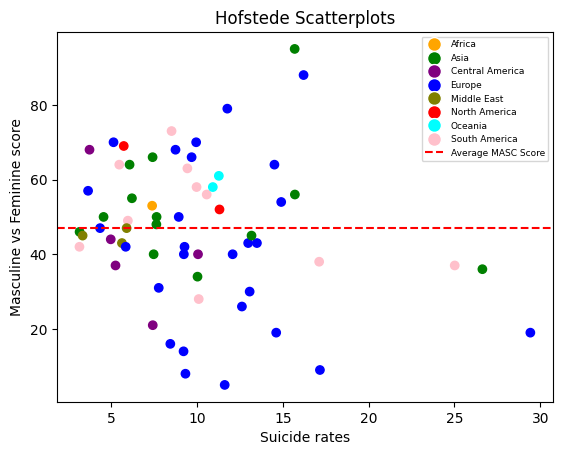

In [ ]:
"""
Scatterplot 1
"""

COUNTRY = "country_continent2.csv"
FILE = "hofstede.csv"
SUICIDE = "suicide_rates.csv"
import numpy as np
import csv
import matplotlib.pyplot as plt
import urllib.request


continent_color = {
    'Africa': 'orange',
    'Asia': 'green',
    'Central America': 'purple',
    'Europe': 'blue',
    'Middle East': 'olive',
    'North America': 'red',
    'Oceania': 'cyan',
    'South America': 'pink',
}

def add_suicide_rate_to_country(rate, country_to_find, countries):
    for country in countries:
        if country[0] == country_to_find:
            country.append(rate)

def get_color_for_continent(country):
    country_continent = {}
    response = urllib.request.urlopen(country_continent2_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        country_continent[row[0]] = row[1]
            
    continent = country_continent[country]
    return continent_color[continent]

def main():

            
    # Create lists for data we actually want
    # each item in the list is in the format [country, idv, masc, suicide rate]
    countries = []

    # Open Hofstede file 
    response = urllib.request.urlopen(hofstede_url)
    data = response.read().decode('utf-8')
    lines = csv.reader(data.splitlines())
    for row in lines:

            # if line does not contain any data, skip over and reiterate loop
        line = row[0].split(";")
        if line[3] == "#NULL!" or line [3] == "idv":
              continue
        else:
              scores = []
              scores.append(line[1])
              scores.append(float(line[3]))
              scores.append(float(line[4]))
              countries.append(scores)

    # Open Suicide rates file
    response = urllib.request.urlopen(suicide_rates_url)
    data = response.read().decode('utf-8')
    lines = csv.reader(data.splitlines())
    for row in lines:
          if row[2] == "2015" and row[3] != "":
              add_suicide_rate_to_country(float(row[3]), row[0], countries)

    # Get intersection of countries in both lists so that data from both 
    # files are describing the same countries and sort alphabetically
    filtered = list(filter(lambda x: len(x) == 4, countries))
    countries_final = sorted(filtered, key=lambda x: x[0])


    # Scatter plot of idv and masc score against suicide rate, colored by continent
    x = [country[3] for country in countries_final]
    y = [country[2] for country in countries_final]
    c = [get_color_for_continent(country[0]) for country in countries_final]
    plt.scatter(x, y, c=c)
    
    avg_masc = np.mean(y)
    plt.axhline(y=avg_masc, color='r', linestyle='--', label='Average MASC Score')
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                   markerfacecolor=color, markersize=10)
        for continent, color in continent_color.items()
    ]
    legend_elements.append(
        plt.Line2D([0], [0], color='r', linestyle='--', label='Average MASC Score')
    )
    
    plt.legend(handles=legend_elements, loc='upper right', prop={'size': 6.5})
    plt.xlabel('Suicide rates')
    plt.ylabel('Masculine vs Feminine score')
    plt.title('Hofstede Scatterplots')
    plt.show()
    
   
main()

By plotting suicide rates and Masculine vs Feminine Scores over time, we were  able to observe there was no significant relationship. While there were a few outliers with one European country having the highest suicide rate while have a low Masculine vs Feminine Score, the majority of plots on our graph are fall close to the average MASC score while maintaining a relatively low suicide rate (<15%).

The second function will show any relationship between countries with low vs high individuality scores (x-axis) and suicide rates (y).

Questions we had before graphing this:

1. Does having a high tolerance for hierarchal powers (individuality score) impact suicide rates?

2. Is there a trend with suicide rates by continent?

Prediction we had:
We predicted that there would be a positive correlation between suicide rates and individuality scores because having a rigid hiearchy can create extreme societal pressures which could lead to a country having a low mental health status.

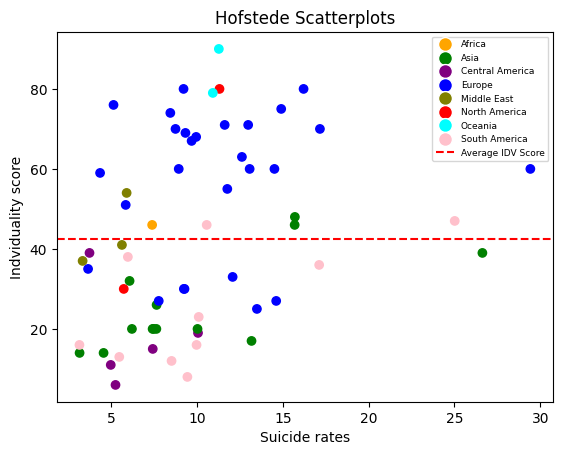

In [ ]:
"""
Scatterplot 2

"""

COUNTRY = "country_continent2.csv"
FILE = "hofstede.csv"
SUICIDE = "suicide_rates.csv"
import numpy as np
import csv
import matplotlib.pyplot as plt
import urllib.request


continent_color = {
    'Africa': 'orange',
    'Asia': 'green',
    'Central America': 'purple',
    'Europe': 'blue',
    'Middle East': 'olive',
    'North America': 'red',
    'Oceania': 'cyan',
    'South America': 'pink',
}

def add_suicide_rate_to_country(rate, country_to_find, countries):
    for country in countries:
        if country[0] == country_to_find:
            country.append(rate)

def get_color_for_continent(country):
    country_continent = {}
    response = urllib.request.urlopen(country_continent2_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        country_continent[row[0]] = row[1]
            
    continent = country_continent[country]
    return continent_color[continent]

def main():

            
    # Create lists for data we actually want
    # each item in the list is in the format [country, idv, masc, suicide rate]
    countries = []

    # Open Hofstede file 
    response = urllib.request.urlopen(hofstede_url)
    data = response.read().decode('utf-8')
    lines = csv.reader(data.splitlines())
    for row in lines:

            # if line does not contain any data, skip over and reiterate loop
        line = row[0].split(";")
        if line[3] == "#NULL!" or line [3] == "idv":
              continue
        else:
              scores = []
              scores.append(line[1])
              scores.append(float(line[3]))
              scores.append(float(line[4]))
              countries.append(scores)

    # Open Suicide rates file
    response = urllib.request.urlopen(suicide_rates_url)
    data = response.read().decode('utf-8')
    lines = csv.reader(data.splitlines())
    for row in lines:
          if row[2] == "2015" and row[3] != "":
              add_suicide_rate_to_country(float(row[3]), row[0], countries)

    # Get intersection of countries in both lists so that data from both 
    # files are describing the same countries and sort alphabetically
    filtered = list(filter(lambda x: len(x) == 4, countries))
    countries_final = sorted(filtered, key=lambda x: x[0])

    
    # Scatter plot of idv score against suicide rate, colored by continent
    x = [country[3] for country in countries_final]
    y = [country[1] for country in countries_final]
    c = [get_color_for_continent(country[0]) for country in countries_final]
    plt.scatter(x, y, c=c)
    
    avg_idv = np.mean(y)
    plt.axhline(y=avg_idv, color='r', linestyle='--', label='Average IDV Score')
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                   markerfacecolor=color, markersize=10)
        for continent, color in continent_color.items()
    ]
    legend_elements.append(
        plt.Line2D([0], [0], color='r', linestyle='--', label='Average IDV Score')
    )
    
    plt.legend(handles=legend_elements, loc='upper right', prop={'size': 6.5})
    plt.xlabel('Suicide rates')
    plt.ylabel('Indviduality score')
    plt.title('Hofstede Scatterplots')
    plt.show()
    
main()

By plotting suicide rates and individuality score, we were  able to observe there was no significant relationship. We found that there was a number of European countries that had an individuality score above the average. On the other hand, majority of South American countries had scores under the average. However, regardless of where these countries put themselves against the average, there is no significant outliers or trends.

The third function will show any relationship between GDP per capita (x) and depressions count (y).

Questions we had before graphing this:

1. What is the relationship between GDP per capita and depression?

2. Is there a trend with GDP and depression by continent?

Prediction we had:
We predicted that there would be a negative correlation between GDP per capita and depression scores because having a lower GDP per capita means less economic output. Countries with lower GDP per capita would most likely have less health resources to treat mental health.

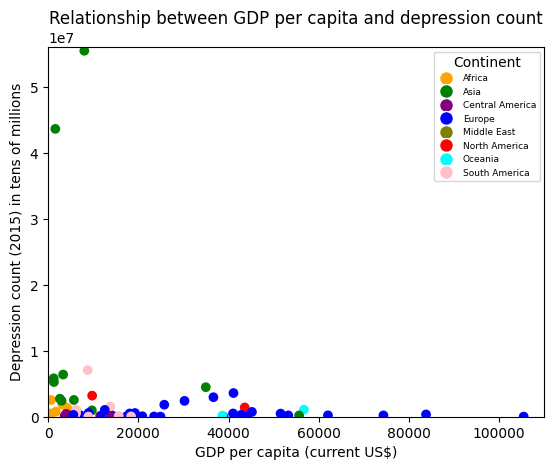

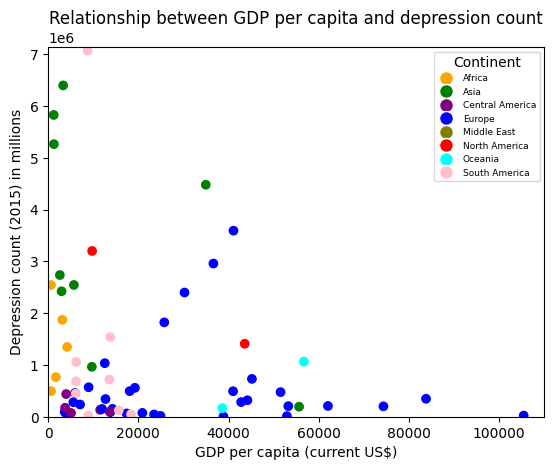

In [ ]:
"""
Scatterplot 3

"""
import csv
import matplotlib.pyplot as plt
import urllib.request

COUNTRY = "country_continent.csv"
GDP_FILE = "Databank.csv"
DEPRESSION_FILE = "depression_count.csv"

continent_color = {
    'Africa': 'orange',
    'Asia': 'green',
    'Central America': 'purple',
    'Europe': 'blue',
    'Middle East': 'olive',
    'North America': 'red',
    'Oceania': 'cyan',
    'South America': 'pink',
}

def get_max(lst):
    """
    Returns the maximum value in the given list.
    """
    if not lst:
        return None
    max_val = lst[0]
    for val in lst:
        if val > max_val:
            max_val = val
    return max_val

def get_third_max(lst):
    """
    Returns the third largest number in the given list.
    If the list has less than 3 elements, returns None.
    """
    if len(lst) < 3:
        return None
    lst = sorted(set(lst), reverse=True)
    return lst[2]

def main():
    
    # read in master list of countries and continents
    continent_data = {}
    response = urllib.request.urlopen(country_continent_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        continent_data[row[0]] = row[1]
    
    # Read GDP data and store relevant countries and GDP values in a dictionary
    gdp_data = {}
    response = urllib.request.urlopen(databank_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
            if row[0] == 'GDP per capita (current US$)' and row[19] != '..' and row[2] in continent_data:
                gdp_data[row[2]] = float(row[19])
    
    # Read depression count data and store relevant countries and depression counts in a dictionary
    depression_data = {}
    response = urllib.request.urlopen(depression_count_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
            if row[2] == "2015" and row[0] in continent_data:
                depression_data[row[0]] = float(row[3])
    
    # Get intersection of countries in both lists so that data from both 
    # files are describing the same countries and sort alphabetically
    countries = sorted(set(gdp_data.keys()) & set(depression_data.keys()))
    
    # Create lists of GDP values and depression counts for the selected countries
    gdp_values = [gdp_data[country] for country in countries if country in continent_data]
    depression_counts = [depression_data[country] for country in countries if country in continent_data]
    
    # Create a list of colors for each point based on the continent of the corresponding country
    colors = [continent_color[continent_data[country]] for country in countries if country in continent_data]
    
    # Create legend labels and legend colors
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                   markerfacecolor=color, markersize=10)
        for continent, color in continent_color.items()
    ]
    
    
    # Plot scatter plot
    plt.scatter(gdp_values, depression_counts, c=colors)
    plt.xlabel("GDP per capita (current US$)")
    plt.xlim(0, 110000)
    plt.ylabel("Depression count (2015) in tens of millions")
    plt.ylim(0, (get_max(depression_counts) * 1.01))
    plt.title("Relationship between GDP per capita and depression count")
    plt.legend(handles = legend_elements, loc='upper right', \
               title='Continent', prop = {'size':6.5})
    plt.show()
    
    # Plot scatter plot
    plt.scatter(gdp_values, depression_counts, c=colors)
    plt.xlabel("GDP per capita (current US$)")
    plt.xlim(0, 110000)
    plt.ylabel("Depression count (2015) in millions")
    plt.ylim(0, (get_third_max(depression_counts) * 1.01))
    plt.title("Relationship between GDP per capita and depression count")
    plt.legend(handles = legend_elements, loc='upper right', \
               title='Continent', prop = {'size':6.5})
    plt.show()

main()

The second graph in this part the same graph but without outliers for depression count. After plotting GDP per capita (current US) and Depression Count (2015) in millions over time, we were able to observe a slight negative correlation due to the fact that countries that have high depression count tend to have less than 20000 GDP per capita.


**Scatterplot #4**

The fourth function will show any relationship between Poverty Headcount Ratio (x) and Suicide Rate (y).

Questions we had before graphing this:

1. What is the relationship between poverty and suicide?

2. Is there a trend with poverty and suicide by continent?

Prediction we had:
We predicted that there would be a negative correlation between poverty headcount ratio and suicide rates because people living in poverty tend to have wider range of stressors that impact mental health such as poor living conditions, lack of access to healthcare, and unemployment.

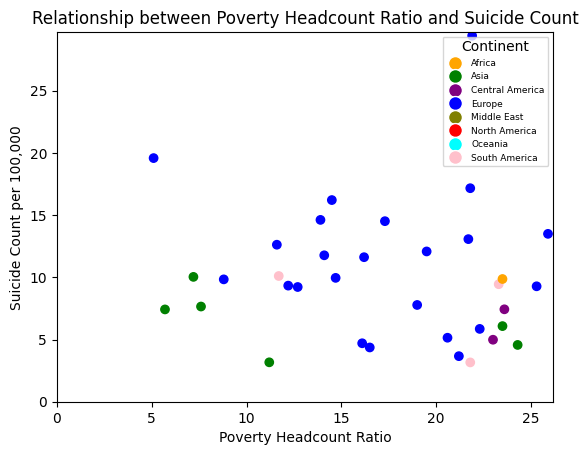

In [ ]:
"""
Scatterplot 4

"""
import csv
import matplotlib.pyplot as plt

COUNTRY = "country_continent.csv"
SUICIDE_FILE = "Databank.csv"
SUICIDE = "suicide_rates.csv"

continent_color = {
    'Africa': 'orange',
    'Asia': 'green',
    'Central America': 'purple',
    'Europe': 'blue',
    'Middle East': 'olive',
    'North America': 'red',
    'Oceania': 'cyan',
    'South America': 'pink',
}

def get_max(lst):
    """
    Returns the maximum value in the given list.
    """
    if not lst:
        return None
    max_val = lst[0]
    for val in lst:
        if val > max_val:
            max_val = val
    return max_val


def main():
    
    # read in master list of countries and continents
    continent_data = {}
    response = urllib.request.urlopen(country_continent_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        continent_data[row[0]] = row[1]
    
    # Read Poverty Headcount Ratio and store relevant countries and ratios in a dictionary
    pov_ratio = {}
    response = urllib.request.urlopen(databank_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        if row[0] == 'Poverty headcount ratio at national poverty lines (% of population)' and row[19] != '..' and row[2] in continent_data:
            pov_ratio[row[2]] = float(row[19])
  
    
    # Read depression count data and store relevant countries and depression counts in a dictionary
    suicide_data = {}
    response = urllib.request.urlopen(suicide_rates_url)
    data = response.read().decode('utf-8')
    reader = csv.reader(data.splitlines())
    for row in reader:
        if row[2] == "2015" and row[0] in continent_data and row[3] != '':
            suicide_data[row[0]] = float(row[3])
    
    # Get intersection of countries in both lists so that data from both 
    # files are describing the same countries and sort alphabetically
    countries = sorted(set(pov_ratio.keys()) & set(suicide_data.keys()))
    
    # Create lists of GDP values and depression counts for the selected countries
    ratio_values = [pov_ratio[country] for country in countries if country in continent_data]
    suicide_counts = [suicide_data[country] for country in countries if country in continent_data]
    
    # Create a list of colors for each point based on the continent of the corresponding country
    colors = [continent_color[continent_data[country]] for country in countries if country in continent_data]
    
    # Create legend labels and legend colors
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                   markerfacecolor=color, markersize=10)
        for continent, color in continent_color.items()
    ]
    
    
    # Plot scatter plot
    plt.scatter(ratio_values, suicide_counts, c=colors)
    plt.xlabel("Poverty Headcount Ratio")
    plt.xlim(0, (get_max(ratio_values) * 1.01))
    plt.ylabel("Suicide Count per 100,000")
    plt.ylim(0, (get_max(suicide_counts) * 1.01)) 
    plt.title("Relationship between Poverty Headcount Ratio and Suicide Count")
    plt.legend(handles = legend_elements, loc='upper right', \
               title='Continent', prop = {'size':6.5})
    plt.show()
    
  
main()



After plotting Poverty Headcount Ratio and Suicide Count per 100,000 deaths, we can see that there is no correlation between headcount ratio and suicide rates. Furthermore, there is no correlation by continent in terms of suicide counts or poverty.


**Discussion**

Our results were underwhelming. After looking at each graph that was plotted, we were unable to find any significant results except for GDP per capita and depression with had a slight negative correlation. 

One possible explanation for the scatterplots that measure mental health against cultural indicators for this is that cultural factors are too complex and certain cultural indicators by themselves do not affect mental health like we predicted. Another explanation could be that the data does not represent the country as a whole, and that these cultural indicators vary from region to region in different countries. Thus, the data could have just not been accounting for that variation. 

An explanation for negative correlation for the scatterplot that measures GDP per capita and depression is that a country with higher GDP per capita is more likely to have more access to health resources which can mititgate negative mental health impacts of that country. However, low GDP per capita is most likely not the defining factor in mental health since the correlation was only a loose coorelation. 

Lastly, there was no correlation between poverty headocunt ratio and suicide. We initially thought that there would be a positive correlation because low poverty tend to come with higher stressors that have negative mental health consequences, however this is not the case. Simply, poverty is not a defining factor in a country's mental health status.

**Conclusion** 

In conclusion, our project was initially geared to investigate potential links between global mental health and economic/cultural indicators such as GDP per capita, culture, and gender. We analyzed the relationship between these indicators by plotting them against depression and suicide rates. After visualzing these relationships onto a graph by color-coding each country and their respective continent, our finding were unable to support our initial predictions. 

In the future, in order to better understand and find a potential relationship, we can find newer datasets that could have provided updated data after COVID19. 
In addition to newer datasets, finding a country vs continent that was able to work across all plots could have definitely added more to our findings. We were only able to graph around 80 countries out of the 195 countries in the world. 


**References**

https://data.world/vizzup/mental-health-depression-disorder-data 

https://github.com/rustom/hofstedes-globe/blob/main/data-parsing/hofstede.csv 

https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#advancedDownloadOptions 

https://corporatefinanceinstitute.com/resources/management/hofstedes-cultural-dimensions-theory/#:~:text=March%2013%2C%202023-,What%20is%20the%20Hofstede's%20Cultural%20Dimensions%20Theory%3F,is%20done%20across%20different%20cultures. 